In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df = pd.read_csv('scrap price.csv')

In [4]:
df.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
print("shape: ", df.shape, "\n")
print("column names : ",df.columns)

shape:  (205, 26) 

column names :  Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
ID                  205 non-null int64
symboling           205 non-null int64
name                205 non-null object
fueltypes           205 non-null object
aspiration          205 non-null object
doornumbers         205 non-null object
carbody             205 non-null object
drivewheels         205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
dfobjects=df.select_dtypes("object")
col=['fueltypes', 'aspiration', 'doornumbers', 'carbody', 'drivewheels', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
for i in col:
    print("Unique Values For {0} :  ".format(i)  ,df[i].unique())

Unique Values For fueltypes :   ['gas' 'diesel']
Unique Values For aspiration :   ['std' 'turbo']
Unique Values For doornumbers :   ['two' 'four']
Unique Values For carbody :   ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Unique Values For drivewheels :   ['rwd' 'fwd' '4wd']
Unique Values For enginelocation :   ['front' 'rear']
Unique Values For enginetype :   ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Unique Values For cylindernumber :   ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Unique Values For fuelsystem :   ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [8]:
# Updating column names  data before creating dummies
col=['fueltypes', 'aspiration', 'doornumbers', 'carbody', 'drivewheels', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
df['drivewheels']=df['drivewheels'].apply(lambda x: "drivewheels_fwd" if x=="fwd" else "drivewheels_not_fwd")
df['aspiration']=df['aspiration'].apply(lambda x: "aspiration_std" if x=="std" else "aspiration_turbo")
df['doornumbers']=df['doornumbers'].apply(lambda x: "doornumbers2" if x=="two" else "doornumbers4")
df['enginelocation']=df['enginelocation'].apply(lambda x: "enginelocation_front" if x=="front" else "enginelocation_rear")
df['enginetype']=df['enginetype'].apply(lambda x: "enginetype_ohc" if x=="ohc" else "enginetype_not_ohc")
df['cylindernumber']=df['cylindernumber'].apply(lambda x: "cylindernumber_not4" if x!="four" else "cylindernumber4")

In [9]:
df.isnull().sum()

ID                  0
symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

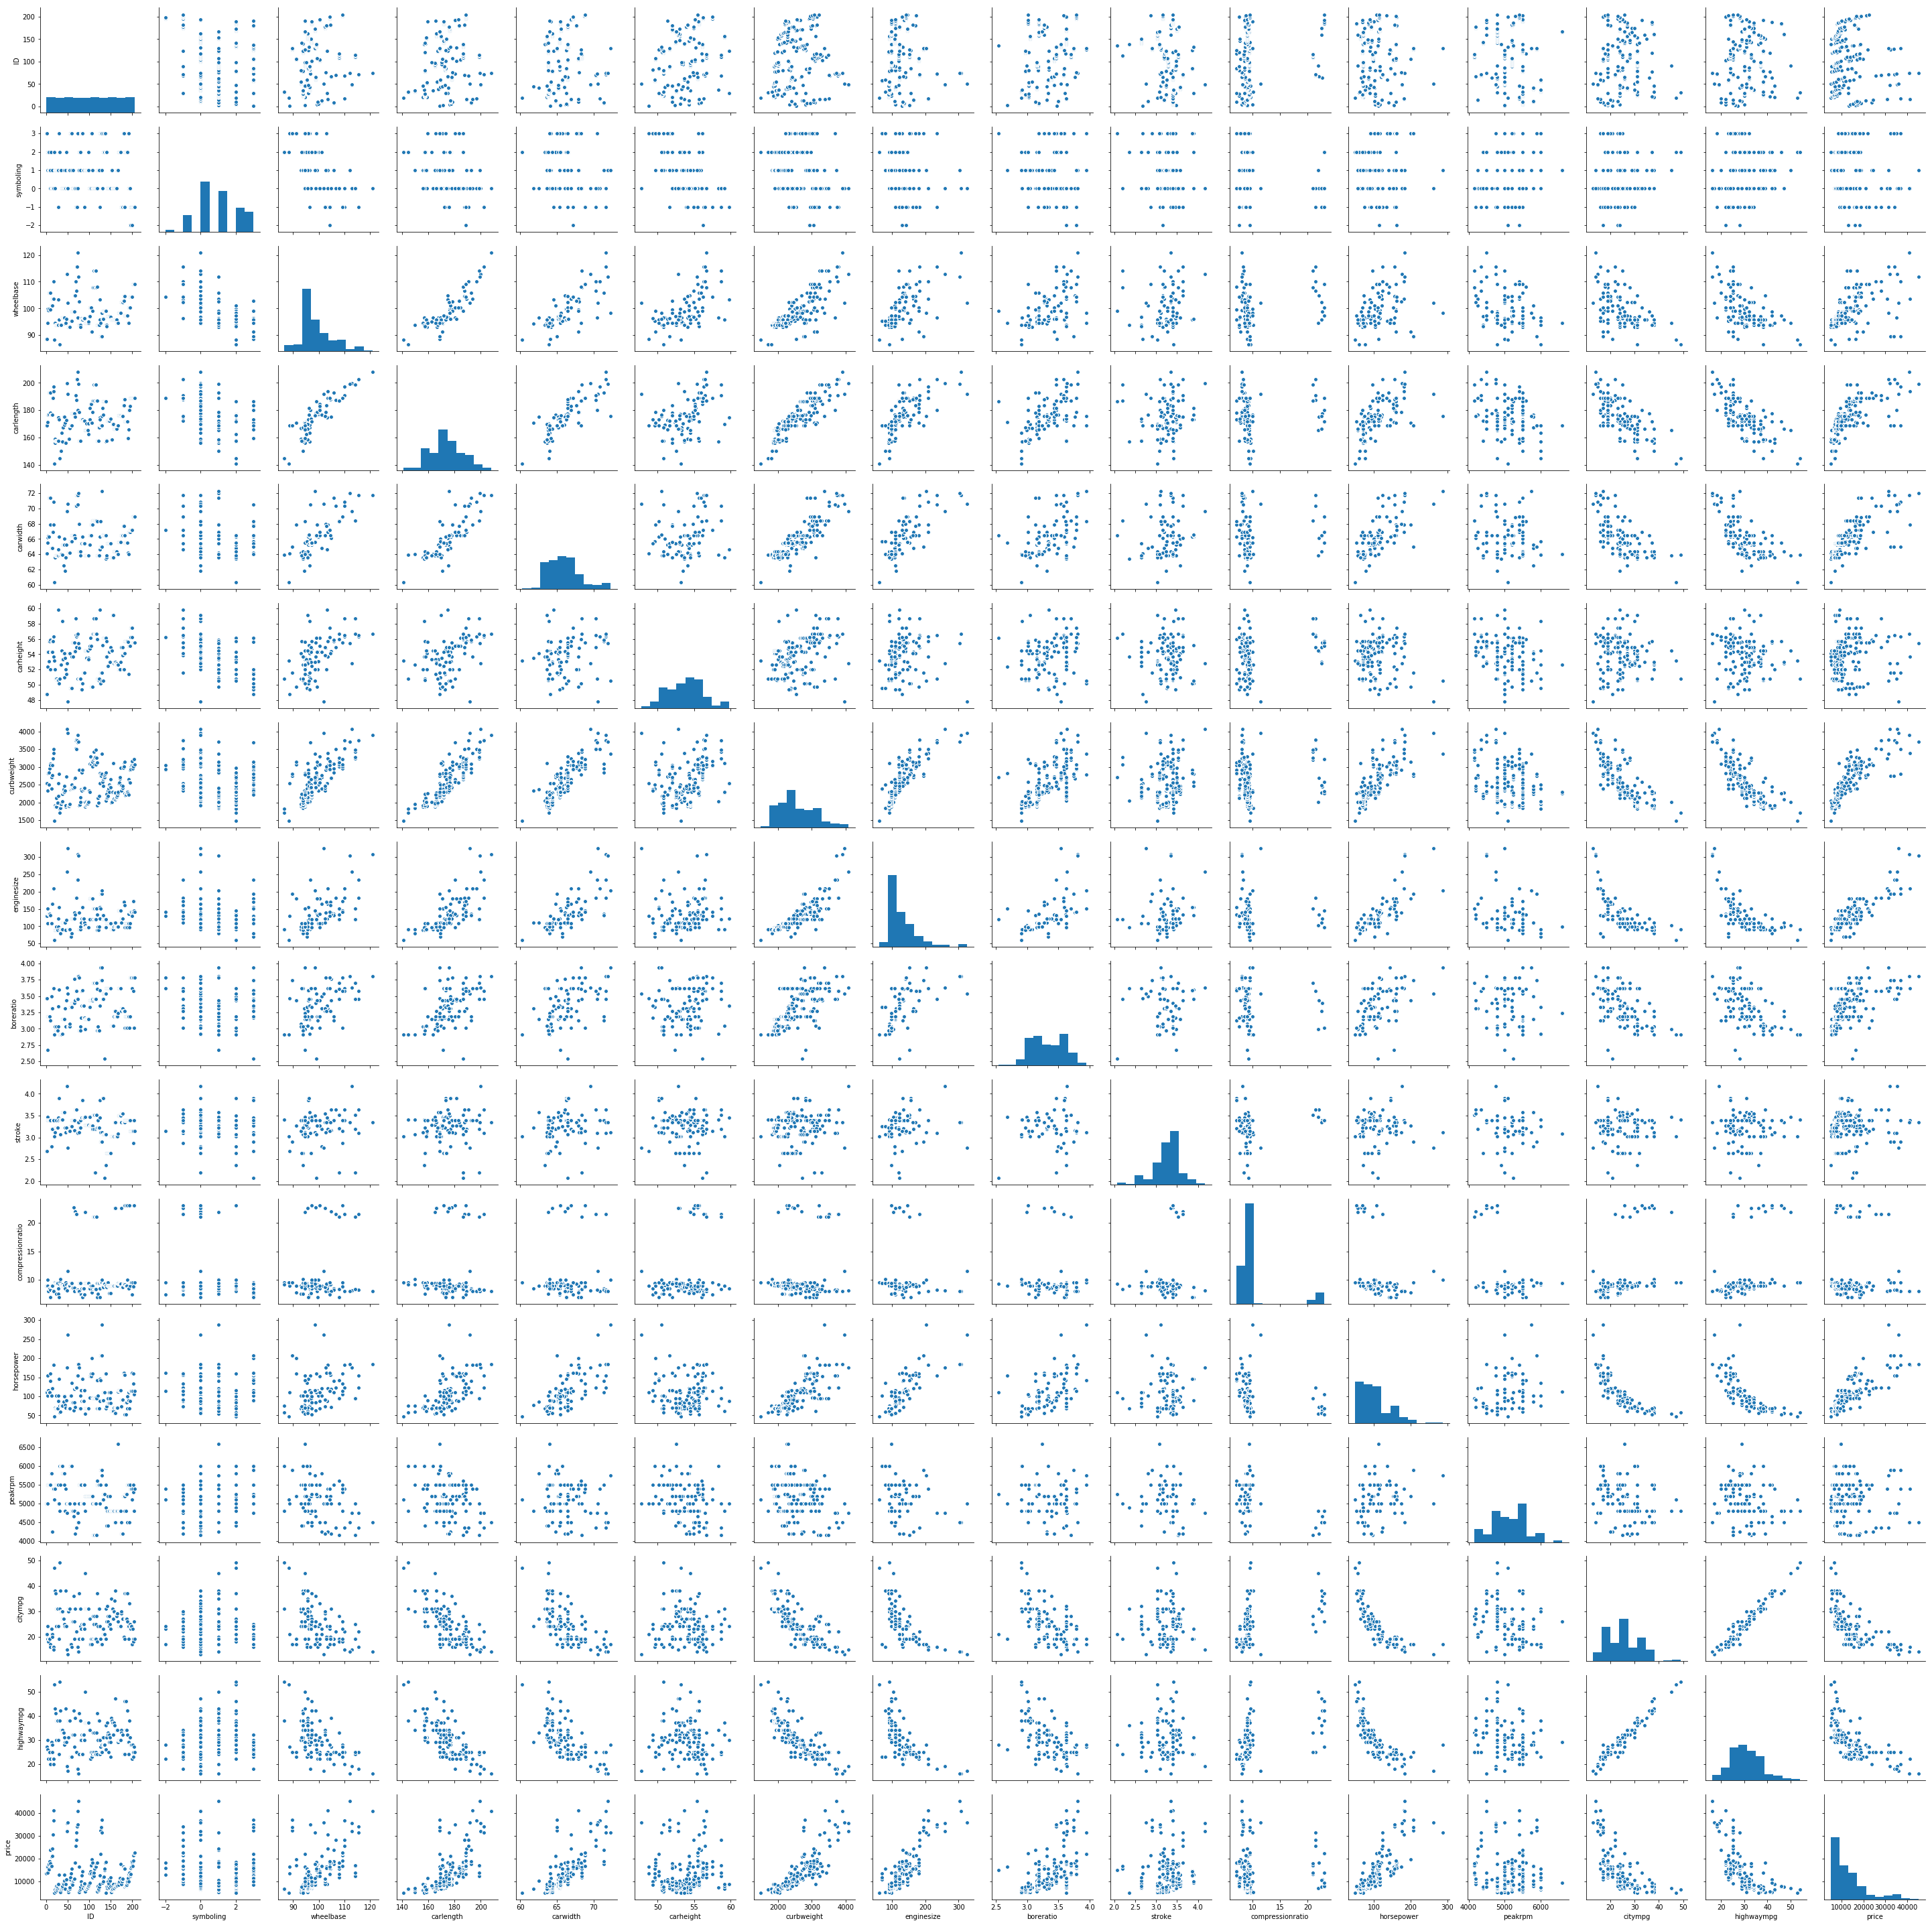

In [10]:
sns.pairplot(df)

In [11]:
df.select_dtypes("int").columns
df.select_dtypes("float").columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'boreratio',
       'stroke', 'compressionratio', 'price'],
      dtype='object')

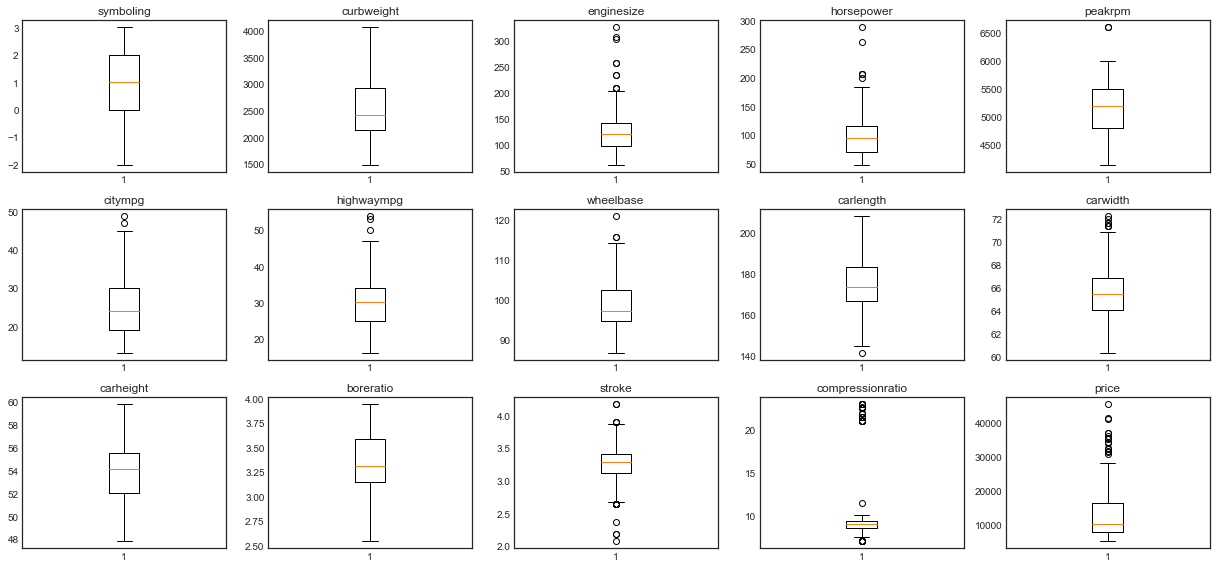

In [12]:
sns.set_style("white")

col2=['symboling', 'curbweight', 'enginesize', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'boreratio',
       'stroke', 'compressionratio', 'price'] # numerical variables- 15 columns

plt.figure(figsize=(17,8))
n=np.arange(0,17,1)

for i,k in zip(col2,n):
    plt.subplot(3,5,k+1)
    plt.boxplot(df[i])
    plt.title(col2[k])
    plt.tight_layout()


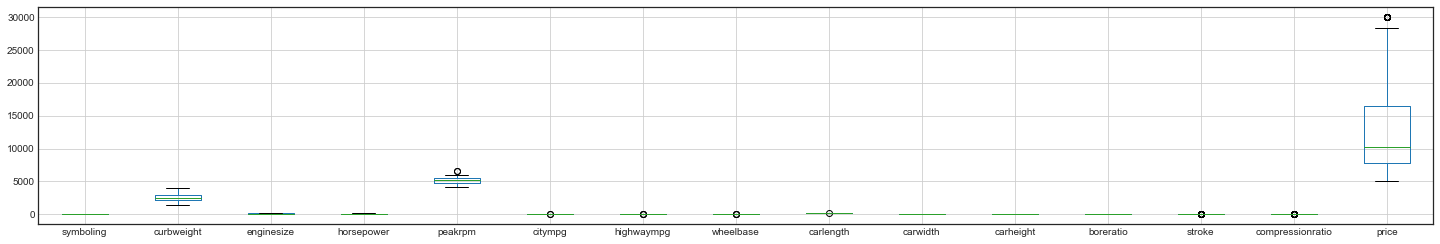

In [13]:
# using mode to remove outiers

sns.set_style("white")
plt.figure(figsize=(25,4))

df['compressionratio'].mode()  # mode is 9.0
df['compressionratio']=df['compressionratio'].apply(lambda x: 11.0 if x>11.0 else x)

df['horsepower']=df['horsepower'].apply(lambda x: 120 if x>200 else x)

df['horsepower'].mode()  # mode is 68.0
df['horsepower']=df['horsepower'].apply(lambda x: 68 if x>190 else x)

df['carwidth'].mode()  # mode is 68.0
df['carwidth']=df['carwidth'].apply(lambda x: 70 if x>71 else x)

df['price'].mode()  # mode is 68.0
df['price']=df['price'].apply(lambda x: 30000 if x>30000 else x)

df['enginesize'].mode()  # mode is 68.0
df['enginesize']=df['enginesize'].apply(lambda x: 200 if x>200 else x)

col2=['symboling', 'curbweight', 'enginesize', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'boreratio',
       'stroke', 'compressionratio', 'price']

df[col2].boxplot()

In [14]:
df.drop(["ID","name"], axis=1,inplace=True) # columns not being used in analysis

In [15]:
col=['fueltypes', 'aspiration', 'doornumbers', 'carbody', 'drivewheels', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
for i in col:
    print(df[i].value_counts())
    print("\n")

gas       185
diesel     20
Name: fueltypes, dtype: int64


aspiration_std      168
aspiration_turbo     37
Name: aspiration, dtype: int64


doornumbers4    115
doornumbers2     90
Name: doornumbers, dtype: int64


sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64


drivewheels_fwd        120
drivewheels_not_fwd     85
Name: drivewheels, dtype: int64


enginelocation_front    202
enginelocation_rear       3
Name: enginelocation, dtype: int64


enginetype_ohc        148
enginetype_not_ohc     57
Name: enginetype, dtype: int64


cylindernumber4        159
cylindernumber_not4     46
Name: cylindernumber, dtype: int64


mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64




In [16]:
#Dummy Variables 

col=['fueltypes', 'aspiration', 'doornumbers', 'drivewheels', 'enginelocation', 'enginetype','cylindernumber']
j=[0,1,2,3,4,5,6]


for i,k in zip(col,j):
    colA=pd.get_dummies(df[i], drop_first=True)
    df=pd.concat([df,colA], axis=1)
    df.drop([col[k]], axis=1,inplace=True)

In [22]:
colB=pd.get_dummies(df["carbody"],drop_first=True)
df=pd.concat([df,colB], axis=1)
df.drop(["carbody"], axis=1,inplace=True)


colC=pd.get_dummies(df["fuelsystem"],drop_first=True)
colC
df=pd.concat([df,colC], axis=1)
df.drop(["fuelsystem"], axis=1,inplace=True)


df.rename(columns ={"2bbl":"2bbl_fuelsystem","4bbl":"4bbl_fuelsystem","idi":"idi_fuelsystem","mfi":"mfi_fuelsystem",
                    "spdi":"spdi_fuelsystem","spfi":"spfi_fuelsystem"}, inplace=True)

In [17]:
df.shape

(205, 24)

In [24]:
df.drop("mfi_fuelsystem",axis=1, inplace=True) 

In [25]:
#Training and Scaling data
#train_test_split

df_train, df_test=train_test_split(df,random_state=100, test_size=0.3)

In [26]:
# Scaling
cols_to_scale=df_train.columns
sc=StandardScaler()
df_train[cols_to_scale]=sc.fit_transform(df_train[cols_to_scale])

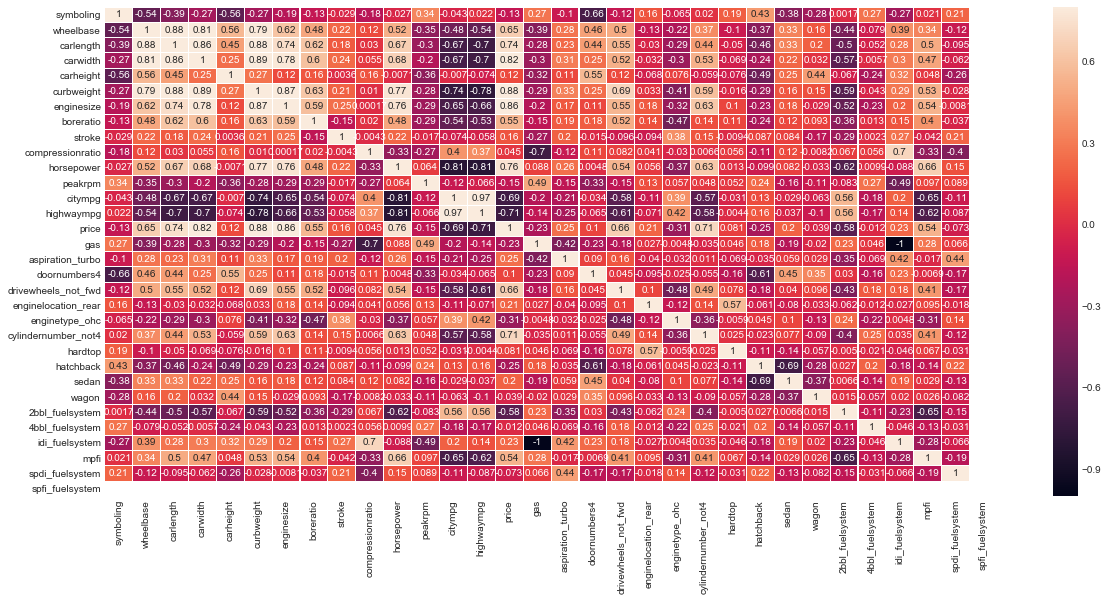

In [27]:
plt.figure(figsize=(20,9))
sns.heatmap(df_train.corr(),vmax=0.8, annot=True, linecolor="white", linewidths=0.01)

In [28]:
y_train=df_train.price   #predictor variable
x_train=df_train.drop("price", axis=1)

In [29]:
linR=LinearRegression()
linR.fit(x_train,y_train)
print(linR.coef_)

[ 0.07021036  0.22310008 -0.20514127  0.16403671 -0.08124938  0.55143616
  0.03502357  0.11466665 -0.12638344  0.07305292  0.13588354  0.00186659
 -0.15103834  0.27806744  0.06229327  0.08726836 -0.02662771  0.06798772
  0.1681019   0.24891981  0.29078068 -0.12324871 -0.33458824 -0.24668406
 -0.20156991 -0.09663603 -0.03684212 -0.06229327 -0.08622218 -0.0754575
  0.        ]


In [30]:
linearR=LinearRegression()

rfe_col=RFE(linearR,n_features_to_select=17)

rfe_col.fit(x_train, y_train)

print(rfe_col.support_)
print(rfe_col.ranking_)  # Ranking of features

[False  True  True  True False  True False  True  True False  True False
  True  True False False False  True  True  True  True  True  True  True
  True False False False False False False]
[ 5  1  1  1  6  1  7  1  1  2  1 14  1  1  3  4 13  1  1  1  1  1  1  1
  1  9 12 11 10  8 15]


In [31]:
colr=x_train.columns[rfe_col.support_]
x_train_rfe=x_train[colr]

In [32]:
x_train_rfe_c=sm.add_constant(x_train_rfe)
lr_rfe=sm.OLS(y_train,x_train_rfe_c)
lm_rfe=lr_rfe.fit()

lm_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     89.40
Date:                Tue, 24 Jan 2023   Prob (F-statistic):           2.14e-61
Time:                        02:02:22   Log-Likelihood:                -18.649
No. Observations:                 143   AIC:                             73.30
Df Residuals:                     125   BIC:                             126.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.151e-16      0.025   8.72e-15      1.000      -0.049       0.049
wheelbase               0.1053      0.066      1.600      0.112      -0.025       0.236
carlength              -0.2635      0.085     -3.097      0.002      -0.432      -0.095
carwidth                0.2608      0.068      3.846      0.000       0.127       0.395
curbweight              0.5752      0.091      6.341      0.000       0.396       0.755
boreratio               0.1003      0.044      2.285      0.024       0.013       0.187
stroke                 -0.1134      0.034     -3.341      0.001      -0.181      -0.046
horsepower              0.1662      0.051      3.276      0.001       0.066       0.267
citympg                -0.1402      0.125     -1.123      0.263      -0.387       0.107
highwaympg              0.2623      0.128      2.053      0.042       0.009       0.515
drivewheels_not_fwd     0.0874      0.040      2.185      0.031       0.008       0.167
enginelocation_rear     0.1662      0.032      5.241      0.000       0.103       0.229
enginetype_ohc          0.2218      0.035      6.294      0.000       0.152       0.292
cylindernumber_not4     0.2814      0.041      6.836      0.000       0.200       0.363
hardtop                -0.1057      0.039     -2.686      0.008      -0.184      -0.028
hatchback              -0.3237      0.083     -3.915      0.000      -0.487      -0.160
sedan                  -0.2702      0.090     -3.005      0.003      -0.448      -0.092
wagon                  -0.2468      0.063     -3.925      0.000      -0.371      -0.122
==============================================================================
Omnibus:                        1.404   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.496   Jarque-Bera (JB):                0.969
Skew:                          -0.129   Prob(JB):                        0.616
Kurtosis:                       3.309   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


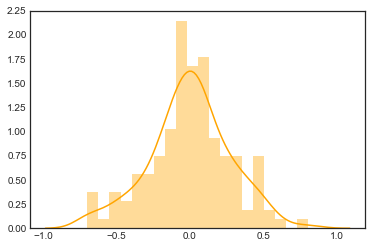

In [33]:
y_train_pred=lm_rfe.predict(x_train_rfe_c)
sns.distplot((y_train - y_train_pred), bins=20, color='orange')

In [34]:
#Testing the Model
x_test_col=x_train_rfe_c.columns
x_test_col=x_test_col.drop("const")

df_test[cols_to_scale]=sc.transform(df_test[cols_to_scale])

y_test=df_test.price
x_test=df_test[x_test_col]

In [35]:
x_test_c=sm.add_constant(x_test)
y_test_pred=lm_rfe.predict(x_test_c)

Text(0,0.5,'Y Test Predicted Values')

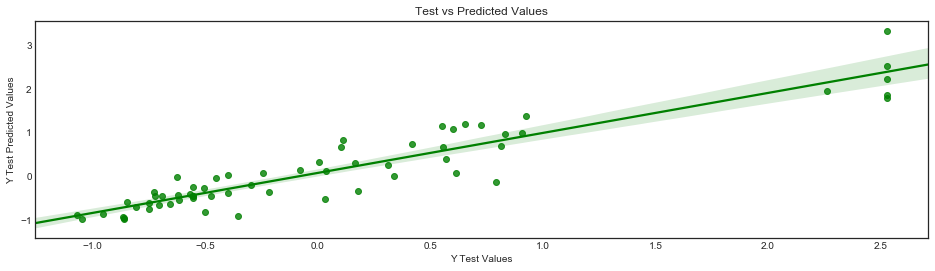

In [36]:
plt.figure(figsize=(16,4))
sns.regplot(y_test, y_test_pred, color="green")
plt.title("Test vs Predicted Values")
plt.xlabel("Y Test Values")
plt.ylabel("Y Test Predicted Values")

In [37]:
r2_score(y_test,y_test_pred) # 85% Variance in Price explained by independent variables 

0.861515779388757

In [ ]:
#Variables which are significant in predicting the price of a car :

In [38]:
lm_rfe.params

const                  2.151057e-16
wheelbase              1.053367e-01
carlength             -2.634660e-01
carwidth               2.607750e-01
curbweight             5.752077e-01
boreratio              1.002605e-01
stroke                -1.134473e-01
horsepower             1.662075e-01
citympg               -1.401550e-01
highwaympg             2.623479e-01
drivewheels_not_fwd    8.741739e-02
enginelocation_rear    1.662111e-01
enginetype_ohc         2.218465e-01
cylindernumber_not4    2.813791e-01
hardtop               -1.056822e-01
hatchback             -3.237455e-01
sedan                 -2.702394e-01
wagon                 -2.468322e-01
dtype: float64